In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk("C:/Users/91764/Desktop/EcoBin Master/DATASET"):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
image_size = [224,224]
train_path = "C:/Users/91764/Desktop/EcoBin Master/DATASET"
valid_path = "C:/Users/91764/Desktop/EcoBin Master/DATASET"

In [4]:
# Import the Resnet50 architecture
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob("C:/Users/91764/Desktop/EcoBin Master/DATASET/*")

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs = resnet.input, outputs = prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model.compile(
loss = 'categorical_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_data = train_datagen.flow_from_directory("C:/Users/91764/Desktop/EcoBin Master/DATASET/TRAIN", target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 22564 images belonging to 2 classes.


In [13]:
test_data = test_datagen.flow_from_directory("C:/Users/91764/Desktop/EcoBin Master/DATASET/TEST",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2513 images belonging to 2 classes.


In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
MODEL_DIR = r"C:/Users/91764/Desktop/EcoBin Master/DATASET"

if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
# Use .keras file extension
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.keras"), save_best_only=True)


In [15]:
r = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)


Epoch 1/20
706/706 [==============================] - 2991s 4s/step - loss: 0.8336 - accuracy: 0.6736 - val_loss: 0.9898 - val_accuracy: 0.6423
Epoch 2/20
706/706 [==============================] - 3204s 5s/step - loss: 0.6778 - accuracy: 0.7285 - val_loss: 1.1890 - val_accuracy: 0.5651
Epoch 3/20
706/706 [==============================] - 3137s 4s/step - loss: 0.6383 - accuracy: 0.7420 - val_loss: 0.8092 - val_accuracy: 0.6769
Epoch 4/20
706/706 [==============================] - 3049s 4s/step - loss: 0.6362 - accuracy: 0.7481 - val_loss: 1.3587 - val_accuracy: 0.5682
Epoch 5/20
706/706 [==============================] - 2860s 4s/step - loss: 0.6176 - accuracy: 0.7623 - val_loss: 0.8155 - val_accuracy: 0.6880
Epoch 6/20
706/706 [==============================] - 2974s 4s/step - loss: 0.6653 - accuracy: 0.7584 - val_loss: 0.8309 - val_accuracy: 0.6972
Epoch 7/20
706/706 [==============================] - 3022s 4s/step - loss: 0.5666 - accuracy: 0.7800 - val_loss: 0.6212 - val_accuracy:

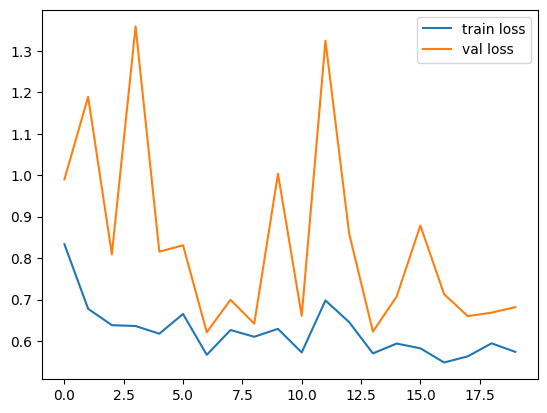

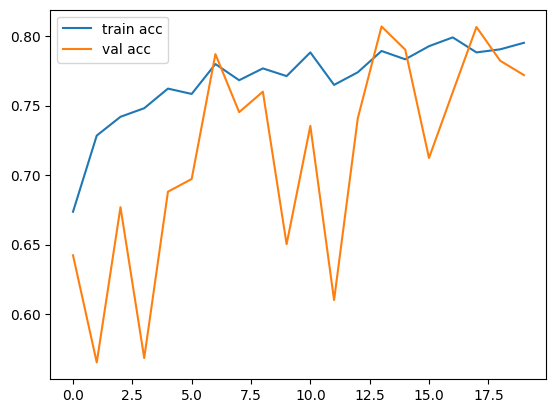

In [16]:
# loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()  
plt.show()

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from keras.utils.vis_utils import plot_model
from glob import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [19]:
from tensorflow.keras.models import load_model

model.save('resnet.h5')

In [20]:
y_pred = model.predict(test_data)
y_pred

79/79 [==============================] - 256s 3s/step


array([[0.99462295, 0.00537703],
       [0.97157955, 0.02842045],
       [0.03772243, 0.9622776 ],
       ...,
       [0.19558509, 0.8044149 ],
       [0.03199481, 0.9680052 ],
       [0.9940824 , 0.00591765]], dtype=float32)

In [21]:
y_pred = np.argmax(y_pred, axis = 1)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model = load_model('resnet.h5')

In [ ]:
# Use a raw string for the file path and verify the path
img_path = r"C:/Users/91764/Desktop/EcoBin Master/test-img/R_10129.jpg"
# Load the image with specified target size
img = image.load_img(img_path, target_size=(224, 224))

In [30]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

1/1 [==============================] - 0s 119ms/step


In [31]:
train_data.class_indices

{'O': 0, 'R': 1}

In [32]:
if(result[0][0] == 1):
    prediction = 'Recyclable'
else:
    prediction = 'Organic'

In [33]:
prediction

'Organic'